In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

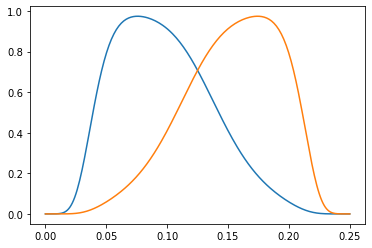

In [51]:
awg_sampling_rate = 1
lengthRepump=0.25*awg_sampling_rate
tRepump,tRepumpStep = np.linspace(0,lengthRepump, int(lengthRepump*1000), retstep=True)

a=10
n=4
c=0.09
def stokes_shape_plot(t,T):
    return (np.exp(-((t - (T/2))/c)**(2*n))*np.cos(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))
def shape_pump_plot(t,T):
    return (np.exp(-((t - (T/2))/c)**(2*n))*np.sin(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

plt.plot(tRepump, stokes_shape_plot(tRepump, lengthRepump))
plt.plot(tRepump, shape_pump_plot(tRepump, lengthRepump))
plt.show()                                                                      

In [3]:
def tophat(num_samples):
    return_samples=np.zeros(num_samples)
    for i in range(num_samples):
        return_samples[i]=1
        for j in range(int(30)):
            return_samples[j]=0
            return_samples[num_samples-1-j]=0
    return return_samples

In [52]:
def export_to_csv(array, scale, filepath, filename):
    try:
        full_path = f"{filepath}/{filename}"
        
        rescaled_arr=np.zeros((len(array)))
        for i, el in enumerate(array):
            if abs(el)<10**(-9):
                rescaled_arr[i]=0
            else:
                rescaled_arr[i]=scale*array[i]

        np.savetxt(full_path, rescaled_arr, delimiter=',',newline=',',fmt='%.10f')
        # Remove trailing comma from the file
        with open(full_path, 'r+') as f:
            f.seek(0, 2)  # Move the cursor to the end of the file
            f.seek(f.tell() - 1, 0)  # Move one character back from the end
            if f.read(1) == ',':  # Check if the last character is a comma
                f.seek(f.tell() - 1, 0)  # Move one character back from the end again
                f.truncate()  # Remove the trailing comma
        # Append a newline at the end of the file
        with open(full_path, 'a') as f:
            f.write('\n')

        print(f"Data successfully exported to {full_path}")
    except Exception as e:
        print(f"Error exporting data to {full_path}: {e}")

In [34]:
for i in np.arange(10,1000,1):
    export_to_csv(np.zeros(int(i)),1,'zeros',f'zero_{int(i)}.csv')

Data successfully exported to zeros/zero_10.csv
Data successfully exported to zeros/zero_11.csv
Data successfully exported to zeros/zero_12.csv
Data successfully exported to zeros/zero_13.csv
Data successfully exported to zeros/zero_14.csv
Data successfully exported to zeros/zero_15.csv
Data successfully exported to zeros/zero_16.csv
Data successfully exported to zeros/zero_17.csv
Data successfully exported to zeros/zero_18.csv
Data successfully exported to zeros/zero_19.csv
Data successfully exported to zeros/zero_20.csv
Data successfully exported to zeros/zero_21.csv
Data successfully exported to zeros/zero_22.csv
Data successfully exported to zeros/zero_23.csv
Data successfully exported to zeros/zero_24.csv
Data successfully exported to zeros/zero_25.csv
Data successfully exported to zeros/zero_26.csv
Data successfully exported to zeros/zero_27.csv
Data successfully exported to zeros/zero_28.csv
Data successfully exported to zeros/zero_29.csv
Data successfully exported to zeros/zero

In [53]:
scale_list=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]

for scale in scale_list:
    export_to_csv(shape_pump_plot(tRepump, lengthRepump),scale, 'pump_pulse_250nsRepump', f'pump_250ns_{int(scale*100)}.csv')

for scale in scale_list:
    export_to_csv(stokes_shape_plot(tRepump, lengthRepump),scale, 'stokes_pulse_250nsRepump', f'stokes_250ns_{int(scale*100)}.csv')

Data successfully exported to pump_pulse_250nsRepump/pump_250ns_100.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_95.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_90.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_85.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_80.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_75.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_70.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_65.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_60.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_55.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_50.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_45.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_40.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_35.csv
Data 

Data successfully exported to pump_pulse_250nsRepump/pump_250ns_15.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_10.csv
Data successfully exported to pump_pulse_250nsRepump/pump_250ns_5.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_100.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_95.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_90.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_85.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_80.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_75.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_70.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_65.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_60.csv
Data successfully exported to stokes_pulse_250nsRepump/stokes_250ns_55.csv
Data successfully exported to stokes_

In [20]:
for scale in scale_list:
    export_to_csv(tophat(2000),scale, 'tophat', f'tophat_2000ns_{int(scale*100)}.csv')

Data successfully exported to tophat/tophat_2000ns_100.csv
Data successfully exported to tophat/tophat_2000ns_95.csv
Data successfully exported to tophat/tophat_2000ns_90.csv
Data successfully exported to tophat/tophat_2000ns_85.csv
Data successfully exported to tophat/tophat_2000ns_80.csv
Data successfully exported to tophat/tophat_2000ns_75.csv
Data successfully exported to tophat/tophat_2000ns_70.csv
Data successfully exported to tophat/tophat_2000ns_65.csv
Data successfully exported to tophat/tophat_2000ns_60.csv
Data successfully exported to tophat/tophat_2000ns_55.csv
Data successfully exported to tophat/tophat_2000ns_50.csv
Data successfully exported to tophat/tophat_2000ns_45.csv
Data successfully exported to tophat/tophat_2000ns_40.csv
Data successfully exported to tophat/tophat_2000ns_35.csv
Data successfully exported to tophat/tophat_2000ns_30.csv
Data successfully exported to tophat/tophat_2000ns_25.csv
Data successfully exported to tophat/tophat_2000ns_20.csv
Data successf